In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data and inspecting it.

In [2]:
car=pd.read_csv("D:\PYTHON_MAIN_COURSE\COURSE-3-ML_PRED.ANALYSIS_1\ASSIGNMENT\CarPrice_Assignment.csv")

In [3]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
car.shape

(205, 26)

In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Data preparation and cleaning for analysis

In [8]:
car['CarName']=car['CarName'].str.replace('vw','volkswagen')

In [9]:
car['CarName']=car['CarName'].str.replace('vokswagen','volkswagen')

In [10]:
car['CarName']=car['CarName'].str.replace('toyouta','toyota')

In [11]:
car['CarName']=car['CarName'].str.replace('porcshce ','porsche ')

In [12]:
car['CarName']=car['CarName'].str.replace('maxda','mazda')

In [13]:
car_com=car['CarName'].str.split(" ",expand=True)
car['Company_name']=car_com[0]

## created a column 'company_name' from 'Car_Name' to extract comapny's name for analysis

## renamed all the same companies with different names to a unique name to facilitate in analysis

In [14]:
car_num=car[['horsepower','peakrpm','citympg','highwaympg','price','compressionratio','stroke','boreratio','fuelsystem',
             'enginesize','wheelbase', 'carlength','carwidth','carheight','curbweight','symboling']]

In [15]:
car_pt=car.pivot_table(index='Company_name',values='price',aggfunc='median')

In [16]:
car_pt.sort_values(by='price',ascending=False)

,price
Company_name,
jaguar,35550.0
buick,32892.0
porsche,32528.0
bmw,22835.0
volvo,18420.0
audi,17710.0
peugeot,16630.0
mercury,16503.0
alfa-romero,16500.0


## We can see that car companies like jaguar,buick ,porcshe top the charts when it comes to price.

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


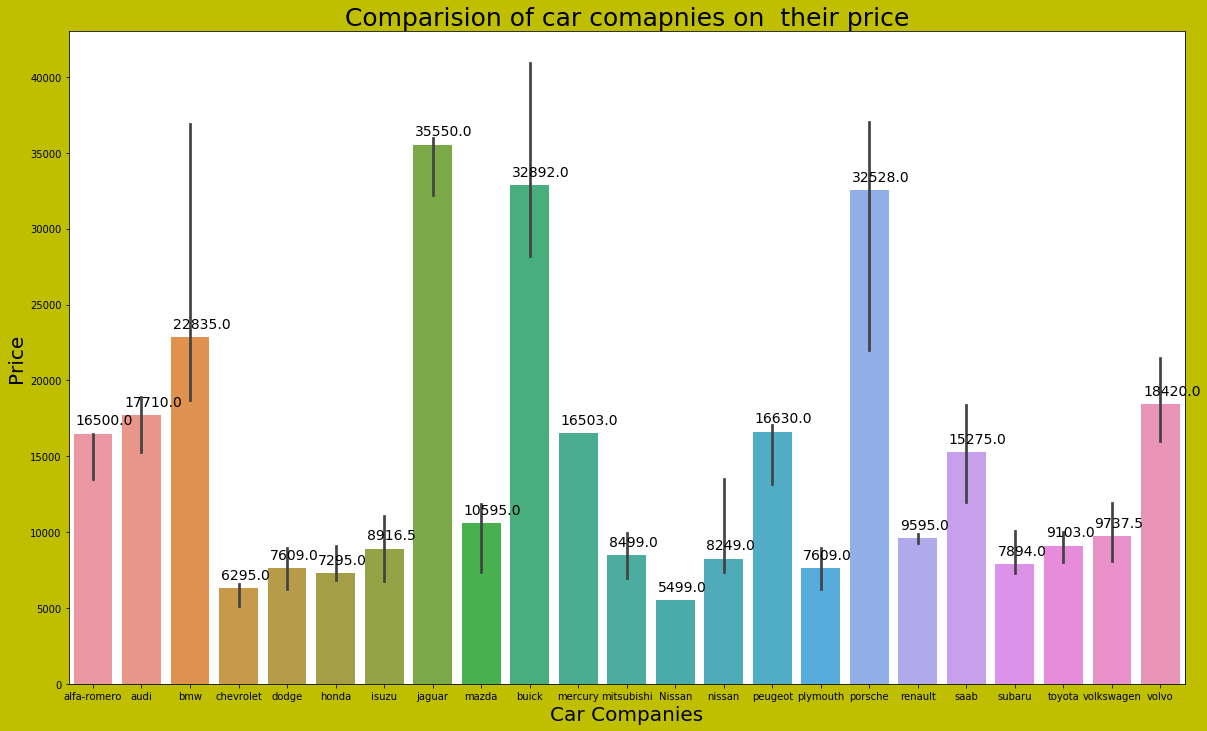

In [17]:
plt.figure(figsize=(20,12),facecolor='y',edgecolor='k')
ax=sns.barplot(x='Company_name',y='price',estimator=np.median,data=car)
plt.title("Comparision of car comapnies on  their price",fontsize=25)
plt.xlabel("Car Companies",fontsize=20)
plt.ylabel("Price",fontsize=20)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+600, \
            str(round((i.get_height()), 2)), fontsize=14, color='black',
                rotation=00)
plt.show()

## The same being depicted through a graph.

<Figure size 2160x360 with 0 Axes>

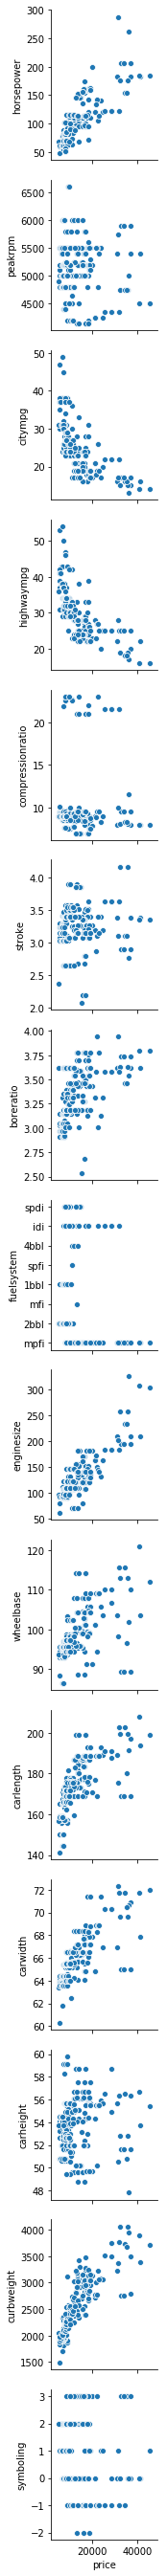

In [18]:
plt.figure(figsize=(30,5))
sns.pairplot(car_num,y_vars=['horsepower','peakrpm','citympg','highwaympg','compressionratio','stroke','boreratio','fuelsystem',
             'enginesize','wheelbase', 'carlength','carwidth','carheight','curbweight','symboling'],x_vars=['price'])
plt.show()

## pairplots of all the numeric columns with the target variable 'price'

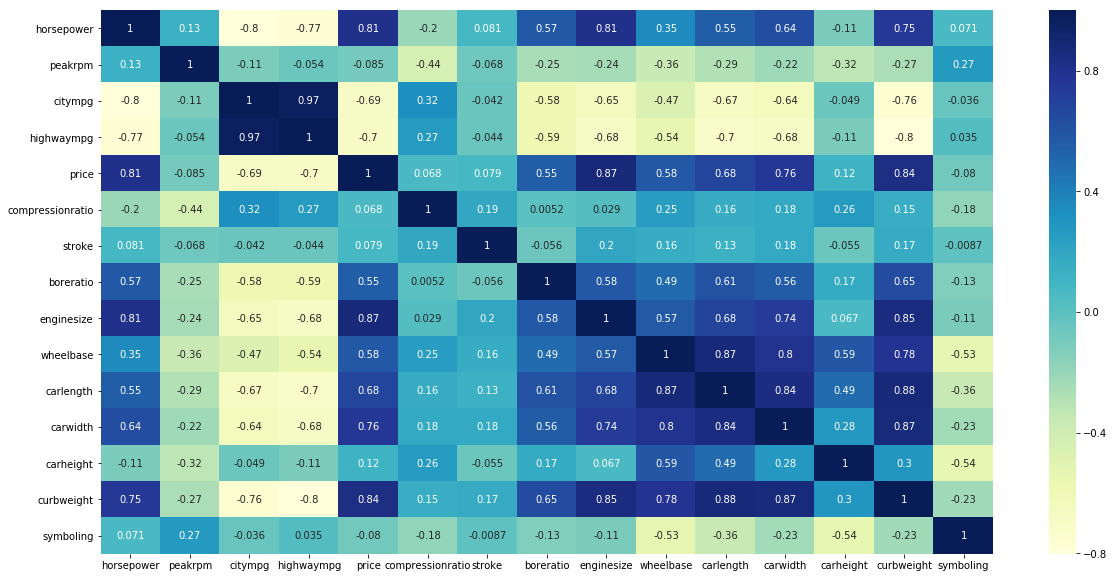

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(car_num.corr(),cmap='YlGnBu',annot=True)
plt.show()

## plotted a heatmap of all numeric predictor variables with 'price',we can see that there's a high correlation of price with 'curbweight','carwidth','carlength','wheelbase','enginesize' and 'horsepower'

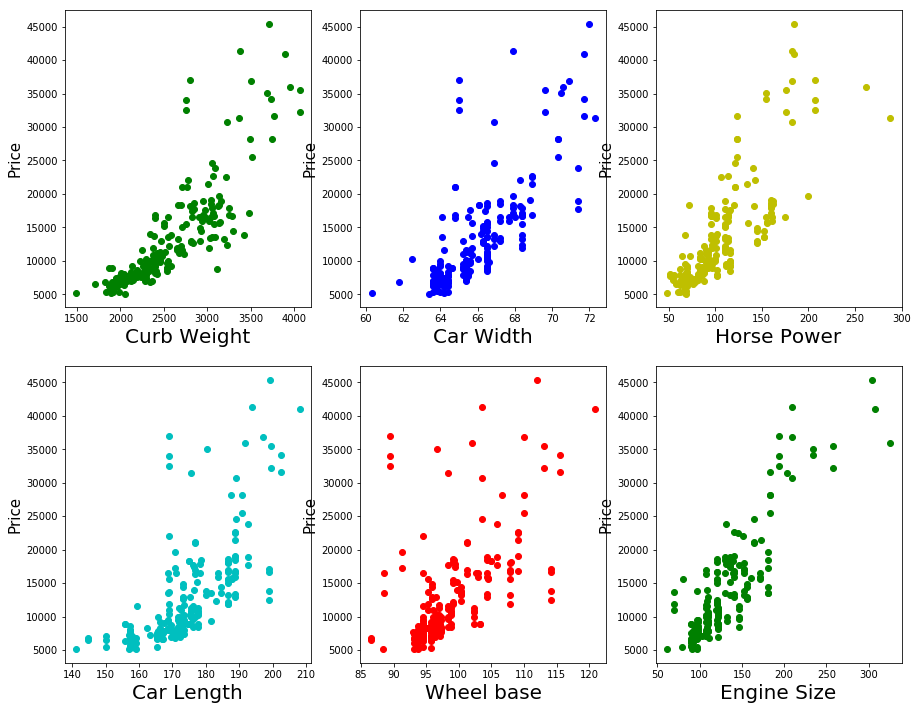

In [20]:
plt.figure(figsize=(15,12))
plt.subplot(2,3,1)
plt.scatter(car['curbweight'],car['price'],c='g')
plt.xlabel("Curb Weight",fontsize=20)
plt.ylabel("Price",fontsize=15)


plt.subplot(2,3,2)
plt.scatter(car['carwidth'],car['price'],c='b')
plt.xlabel("Car Width",fontsize=20)
plt.ylabel("Price",fontsize=15)


plt.subplot(2,3,3)
plt.scatter(car['horsepower'],car['price'],c='y')
plt.xlabel("Horse Power",fontsize=20)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,4)
plt.scatter(car['carlength'],car['price'],c='c')
plt.xlabel("Car Length",fontsize=20)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,5)
plt.scatter(car['wheelbase'],car['price'],c='r')
plt.xlabel("Wheel base",fontsize=20)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,6)
plt.scatter(car['enginesize'],car['price'],c='g')
plt.xlabel("Engine Size",fontsize=20)
plt.ylabel("Price",fontsize=15)


plt.show()


## plotting scatter plots of highly correlated variables with target variable 'price'

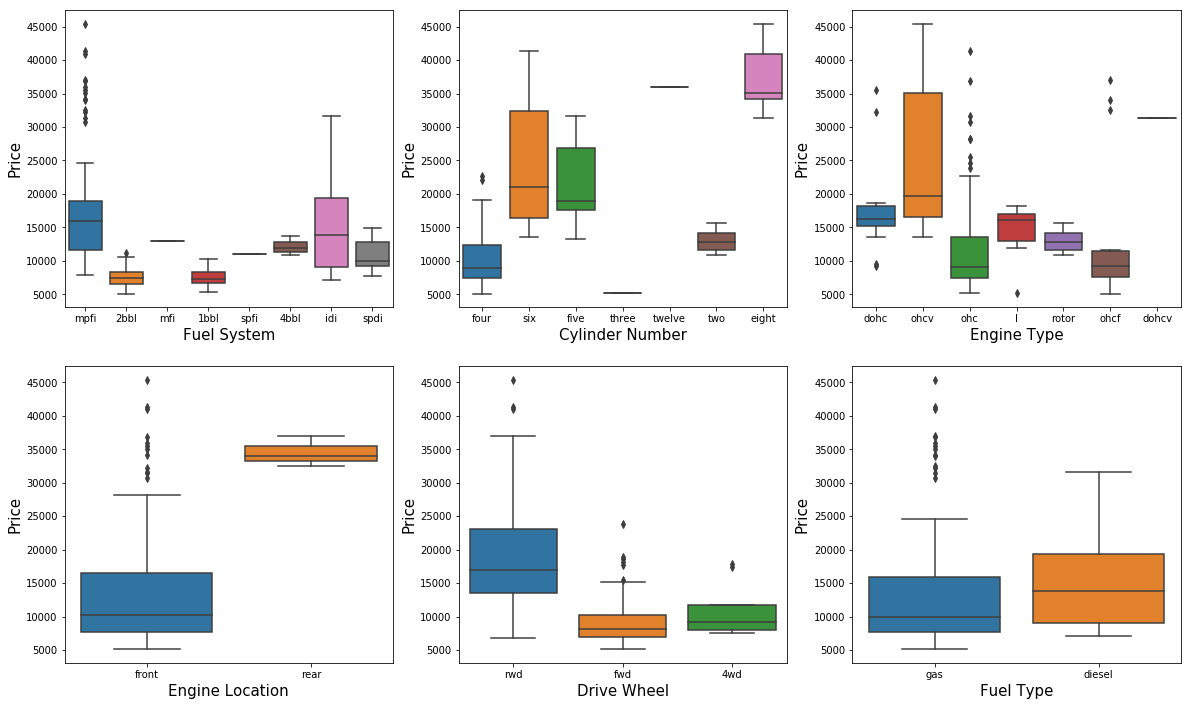

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
plt.xlabel("Fuel System",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.xlabel("Cylinder Number",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,3)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.xlabel("Engine Type",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.xlabel("Engine Location",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.xlabel("Drive Wheel",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,6)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.xlabel("Fuel Type",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.show()

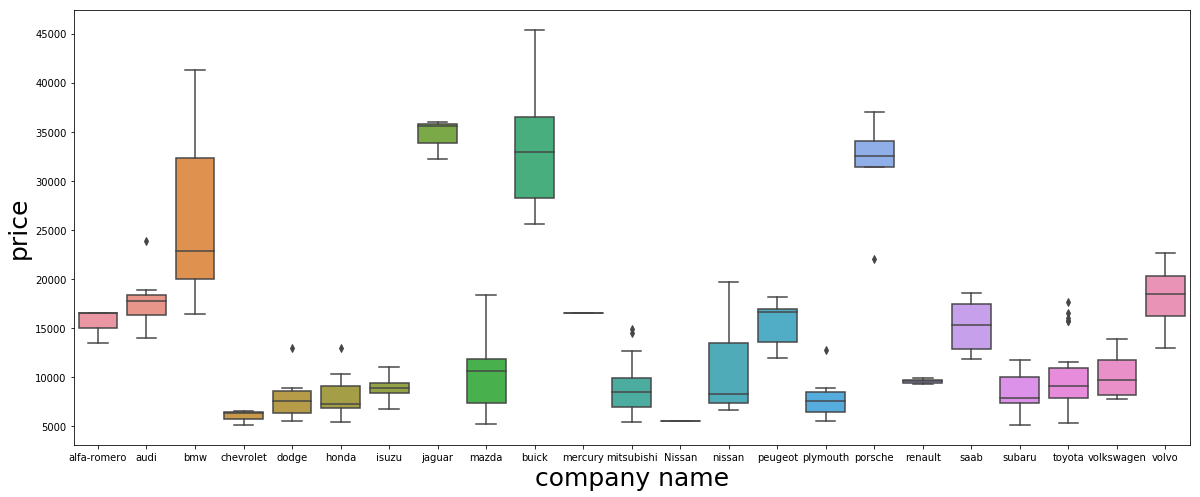

In [22]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Company_name',y='price',data=car)
plt.xlabel("company name",fontsize=25)
plt.ylabel("price",fontsize=25)
plt.show()

## plotting boxplots of categorical variables with target variable 'price'.

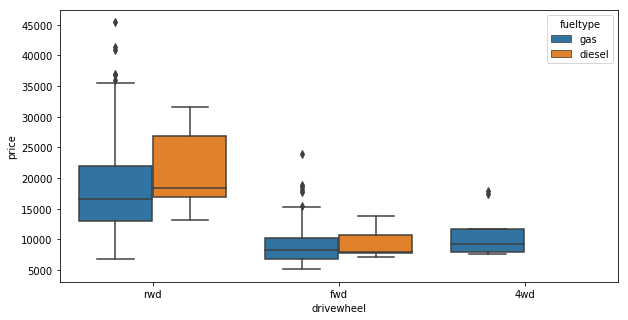

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'drivewheel', y = 'price',hue='fueltype', data = car)
plt.show()


## when drivewheel is 'rwd' there's a fine difference between the median price when the fuel type is gas and when its diesel. 

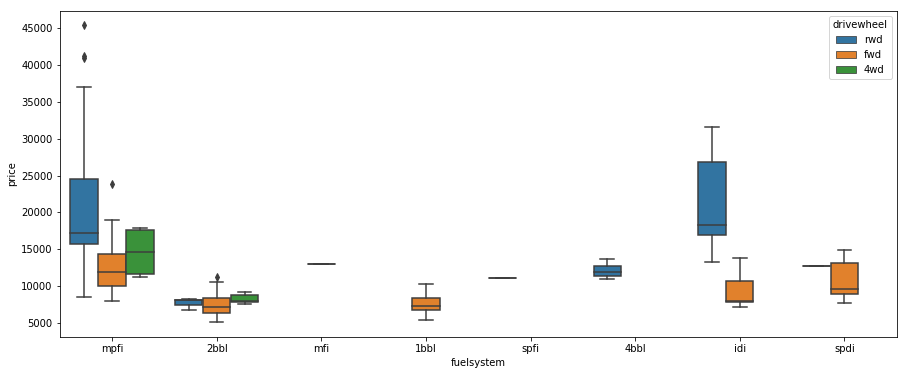

In [24]:
plt.figure(figsize=(15,6))
sns.boxplot(x='fuelsystem',y='price',hue='drivewheel',data=car)
plt.show()

## There's a good amount of difference in median price when fuel system is'mpfi' and drivewheel is 'rwd' ,'fwd' and '4wd'

## Creating dummy variables.

### getting dummies and dropping first column

In [25]:
company=pd.get_dummies(car['Company_name'],drop_first=True)
fuel=pd.get_dummies(car['fueltype'],drop_first=True)
aspire=pd.get_dummies(car['aspiration'],drop_first=True)
door=pd.get_dummies(car['doornumber'],drop_first=True)
body=pd.get_dummies(car['carbody'],drop_first=True)
drive=pd.get_dummies(car['drivewheel'],drop_first=True)
engine=pd.get_dummies(car['enginelocation'],drop_first=True)
enginetp=pd.get_dummies(car['enginetype'],drop_first=True)
cylnum=pd.get_dummies(car['cylindernumber'],drop_first=True)
fuelsys=pd.get_dummies(car['fuelsystem'],drop_first=True)

### adding results to main dataframe 'car'

In [26]:
car=pd.concat([car,company,fuel,aspire,door,body,drive,engine,enginetp,cylnum,fuelsys],axis=1)

### dropping the columns from dataframe for whom we created dummy variables.

In [27]:
car.drop(['Company_name','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
          'cylindernumber','fuelsystem'],axis=1,inplace=True)

In [28]:
car.drop(['car_ID','CarName'],axis=1,inplace=True)

In [29]:
car.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
car['price']=pd.to_numeric(car['price'])

## Splitting the data into Training and Testing  dataset.

In [31]:
from sklearn.model_selection import train_test_split

df_train, df_test=train_test_split(car, train_size=0.7, test_size=0.3, random_state=100)

## Rescaling the features.

###### Using MinMax scaling.

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler=MinMaxScaler()

In [34]:
# applying MinMax Scaler to all variables except dummy variables.
num_vars=['horsepower','peakrpm','citympg','highwaympg','price','compressionratio','stroke','boreratio',
             'enginesize','wheelbase', 'carlength','carwidth','carheight','curbweight','symboling']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
df_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0


In [36]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [37]:
df_train.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
symboling,1.000000,-0.539877,-0.390880,-0.263917,-0.557179,-0.268481,-0.182393,-0.132768,-0.028788,-0.266962,...,0.084692,-0.056133,0.313538,0.001721,0.270560,-0.272756,NaN,0.020993,0.211203,NaN
wheelbase,-0.539877,1.000000,0.877909,0.796888,0.555524,0.792815,0.588600,0.482386,0.224970,0.341651,...,-0.142992,0.049113,-0.092032,-0.438523,-0.079417,0.393481,NaN,0.338923,-0.117645,NaN
carlength,-0.390880,0.877909,1.000000,0.846307,0.454721,0.881495,0.702794,0.620436,0.176814,0.227958,...,-0.216024,0.122216,-0.059682,-0.502693,-0.051502,0.275886,NaN,0.501706,-0.094743,NaN
carwidth,-0.263917,0.796888,0.846307,1.000000,0.245022,0.873884,0.754925,0.580962,0.233631,0.249516,...,-0.210698,0.181043,-0.010753,-0.551596,-0.009279,0.293054,NaN,0.460851,-0.063850,NaN
carheight,-0.557179,0.555524,0.454721,0.245022,1.000000,0.272388,0.045042,0.160835,0.003588,0.289830,...,-0.012171,-0.199022,-0.276412,-0.067042,-0.238523,0.320231,NaN,0.047857,-0.263335,NaN
curbweight,-0.268481,0.792815,0.881495,0.873884,0.272388,1.000000,0.865102,0.625759,0.209277,0.231862,...,-0.162583,0.218088,-0.040089,-0.593771,-0.042573,0.288561,NaN,0.526508,-0.027766,NaN
enginesize,-0.182393,0.588600,0.702794,0.754925,0.045042,0.865102,1.000000,0.545157,0.228768,0.119246,...,-0.131452,0.413197,-0.217946,-0.475134,-0.197035,0.145095,NaN,0.509074,-0.018578,NaN
boreratio,-0.132768,0.482386,0.620436,0.580962,0.160835,0.625759,0.545157,1.000000,-0.152836,0.116317,...,-0.128229,0.075047,0.014733,-0.359207,0.012713,0.153727,NaN,0.399859,-0.036809,NaN
stroke,-0.028788,0.224970,0.176814,0.233631,0.003588,0.209277,0.228768,-0.152836,1.000000,0.212200,...,-0.059299,-0.132053,0.002685,-0.292108,0.002317,0.265493,NaN,-0.041584,0.214983,NaN
compressionratio,-0.266962,0.341651,0.227958,0.249516,0.289830,0.231862,0.119246,0.116317,0.212200,1.000000,...,-0.012263,0.032120,-0.029274,-0.175745,-0.025262,0.983638,NaN,-0.307312,-0.148639,NaN


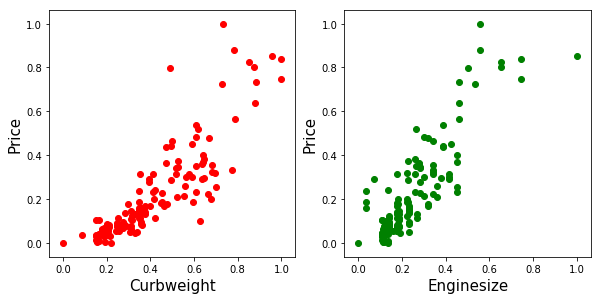

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.scatter(df_train.curbweight,df_train.price,c='r')
plt.xlabel("Curbweight",fontsize=15)
plt.ylabel("Price",fontsize=15)

plt.subplot(2,3,2)
plt.scatter(df_train.enginesize,df_train.price,c='g')
plt.xlabel("Enginesize",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

### plotting scatter plots of highly correlated predictor variables with target variable 'price'

## Dividing X andY sets for model building.

In [39]:
Y_train=df_train.pop('price')
X_train=df_train

## Bulding the model.


In [40]:
# importing RFE and linear regression.
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
# Running RFE  with the output no of  variable equal to 25.

lm=LinearRegression()
lm.fit(X_train,Y_train)

rfe=RFE(lm,25)     #running RFE
rfe=rfe.fit(X_train,Y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 31),
 ('wheelbase', False, 2),
 ('carlength', False, 6),
 ('carwidth', True, 1),
 ('carheight', False, 3),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 10),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 24),
 ('highwaympg', False, 11),
 ('alfa-romero', False, 33),
 ('audi', False, 22),
 ('bmw', True, 1),
 ('buick', False, 23),
 ('chevrolet', False, 8),
 ('dodge', False, 5),
 ('honda', False, 7),
 ('isuzu', False, 28),
 ('jaguar', False, 12),
 ('mazda', False, 36),
 ('mercury', False, 38),
 ('mitsubishi', True, 1),
 ('nissan', False, 34),
 ('peugeot', True, 1),
 ('plymouth', False, 4),
 ('porsche', True, 1),
 ('renault', False, 25),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', False, 32),
 ('volkswagen', False, 37),
 ('volvo', True, 1),
 ('gas', False, 14),
 ('turbo', True, 1),
 ('two', False, 30),
 ('hardtop', False, 16),
 ('hatchback', False, 15),
 (

In [43]:
col=X_train.columns[rfe.support_]

In [44]:
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'horsepower', 'peakrpm', 'bmw', 'mitsubishi', 'peugeot', 'porsche',
       'saab', 'subaru', 'volvo', 'turbo', 'rear', 'dohcv', 'l', 'ohcf',
       'rotor', 'five', 'four', 'three', 'twelve', 'two'],
      dtype='object')

In [45]:
X_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'citympg', 'highwaympg', 'alfa-romero', 'audi', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'nissan',
       'plymouth', 'renault', 'toyota', 'volkswagen', 'gas', 'two', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'ohc', 'ohcv', 'six',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

## Building model using statsmodel for detailed statistics.

In [46]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[col]

In [47]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [48]:
lm=sm.OLS(Y_train,X_train_rfe).fit()     # Running the linear model

In [49]:
#summary of our linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.25e-70
Time:                        16:16:21   Log-Likelihood:                 242.96
No. Observations:                 143   AIC:                            -437.9
Df Residuals:                     119   BIC:                            -366.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3167      0.043     -7.449      0.0

### columns like horsepower is insignificant in presence of other columns.

In [50]:
X_train_new=X_train_rfe.drop(['horsepower'],axis=1)

## now building model without horsepower.

In [51]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_new)

In [52]:
lm=sm.OLS(Y_train,X_train_lm).fit()              # building the linear model

In [53]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     122.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.58e-71
Time:                        16:16:22   Log-Likelihood:                 242.54
No. Observations:                 143   AIC:                            -439.1
Df Residuals:                     120   BIC:                            -370.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3223      0.042     -7.688      0.0

In [54]:
X_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'bmw', 'mitsubishi', 'peugeot', 'porsche', 'saab', 'subaru',
       'volvo', 'turbo', 'rear', 'dohcv', 'l', 'ohcf', 'rotor', 'five', 'four',
       'three', 'twelve', 'two', 'two'],
      dtype='object')

In [55]:
X_train_new=X_train_new.drop(['two'],axis=1)

In [56]:
X_train_lm=sm.add_constant(X_train_new)

In [57]:
lm=sm.OLS(Y_train,X_train_lm).fit()

In [58]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.40e-72
Time:                        16:16:22   Log-Likelihood:                 242.51
No. Observations:                 143   AIC:                            -441.0
Df Residuals:                     121   BIC:                            -375.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3239      0.041     -7.872      0.0

In [59]:
# Calulating VIF for the new model.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\apurv\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
12,subaru,inf
9,peugeot,inf
22,three,inf
18,ohcf,inf
17,l,inf
15,rear,inf
0,const,104.010000
3,enginesize,38.910000
21,four,16.670000
2,curbweight,14.270000


In [60]:
X_train_new=X_train_new.drop(['subaru'],axis=1)

In [61]:
X_train_new.columns       

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'bmw', 'mitsubishi', 'peugeot', 'porsche', 'saab', 'volvo',
       'turbo', 'rear', 'dohcv', 'l', 'ohcf', 'rotor', 'five', 'four', 'three',
       'twelve'],
      dtype='object')

In [62]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_new)

In [63]:
lm=sm.OLS(Y_train,X_train_lm).fit()

In [64]:
print(lm.summary())                 ## checking summary of new model.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.40e-72
Time:                        16:16:23   Log-Likelihood:                 242.51
No. Observations:                 143   AIC:                            -441.0
Df Residuals:                     121   BIC:                            -375.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3239      0.041     -7.872      0.0

In [65]:
# Checking VIF for new model.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,l,inf
21,three,inf
9,peugeot,inf
0,const,104.010000
3,enginesize,38.910000
20,four,16.670000
2,curbweight,14.270000
4,boreratio,10.240000
18,rotor,7.600000
1,carwidth,6.720000


In [66]:
# dropping variables with VIF as 'inf'
X_train_new=X_train_new.drop(['l'],axis=1)

In [67]:
# Cheking VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,104.01
3,enginesize,38.91
19,four,16.67
2,curbweight,14.27
4,boreratio,10.24
17,rotor,7.60
1,carwidth,6.72
18,five,3.86
16,ohcf,3.82
10,porsche,3.80


In [68]:
## Checking VIF for the new model.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,104.01
3,enginesize,38.91
19,four,16.67
2,curbweight,14.27
4,boreratio,10.24
17,rotor,7.60
1,carwidth,6.72
18,five,3.86
16,ohcf,3.82
10,porsche,3.80


In [69]:
# dropping variables with high p value
X_train_new=X_train_new.drop(['dohcv'],axis=1)

In [70]:
X_train_new.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'peakrpm', 'bmw', 'mitsubishi', 'peugeot', 'porsche', 'saab', 'volvo',
       'turbo', 'rear', 'ohcf', 'rotor', 'five', 'four', 'three', 'twelve'],
      dtype='object')

In [71]:
# Building the model again.
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [72]:
lm= sm.OLS(Y_train,X_train_new).fit()

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.82e-73
Time:                        16:16:23   Log-Likelihood:                 242.00
No. Observations:                 143   AIC:                            -442.0
Df Residuals:                     122   BIC:                            -379.8
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3194      0.041     -7.821      0.0

In [74]:
#Checking VIF for new model.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']= [ variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,102.54
3,enginesize,38.35
18,four,16.04
2,curbweight,14.22
4,boreratio,10.13
16,rotor,7.40
1,carwidth,6.57
15,ohcf,3.81
17,five,3.71
20,twelve,3.36


In [75]:
## Dropping variables with high vif and high p value
X_train_new= X_train_new.drop(['curbweight'],axis=1)

In [76]:
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [77]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.62e-73
Time:                        16:16:25   Log-Likelihood:                 237.25
No. Observations:                 143   AIC:                            -434.5
Df Residuals:                     123   BIC:                            -375.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3029      0.042     -7.276      0.0

In [79]:
#cheking vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,100.55
2,enginesize,29.58
17,four,16.04
3,boreratio,10.11
15,rotor,7.06
1,carwidth,6.04
14,ohcf,3.78
16,five,3.65
19,twelve,3.06
4,stroke,2.91


In [80]:
# Dropping column with high vif and p value
X_train_new=X_train_new.drop(['peakrpm'],axis=1)

In [81]:
# building the model
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [82]:
lm=sm.OLS(Y_train,X_train_new).fit()

In [83]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.91e-73
Time:                        16:16:25   Log-Likelihood:                 235.61
No. Observations:                 143   AIC:                            -433.2
Df Residuals:                     124   BIC:                            -376.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2739      0.038     -7.170      0.0

In [84]:
#dropping High pvalue variables.
X_train_new=X_train_new.drop(['peugeot'], axis=1)

In [85]:
#Building model with required variables
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [86]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [87]:
# now summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     146.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.52e-74
Time:                        16:16:26   Log-Likelihood:                 234.13
No. Observations:                 143   AIC:                            -432.3
Df Residuals:                     125   BIC:                            -378.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2707      0.038     -7.052      0.0

In [88]:
#checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,83.17
2,enginesize,27.74
15,four,15.95
3,boreratio,9.14
13,rotor,6.78
1,carwidth,4.88
14,five,3.33
12,ohcf,3.04
17,twelve,3.03
4,stroke,2.78


In [89]:
# Dropping variable with high P  value
X_train_new=X_train_new.drop(['ohcf'],axis=1)

In [90]:
#checking Vif value after dropping the variable.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,61.57
2,enginesize,23.89
14,four,13.63
3,boreratio,6.08
12,rotor,5.71
1,carwidth,4.84
13,five,3.13
16,twelve,2.91
4,stroke,2.53
7,porsche,1.87


In [91]:
# Building model with remaining variables.
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [92]:
lm= sm.OLS(Y_train,X_train_new).fit()

In [93]:
# now  inspecting the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.34e-74
Time:                        16:16:26   Log-Likelihood:                 232.29
No. Observations:                 143   AIC:                            -430.6
Df Residuals:                     126   BIC:                            -380.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2355      0.033     -7.065      0.0

## Now that p-value for all the predictor variables is <.05 , we sholud check  the collinearity of these variables with other variables.

In [94]:
# dropping variables with high VIF value
X_train_new=X_train_new.drop(['enginesize'],axis=1)

In [95]:
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [96]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [97]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     58.92
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.07e-49
Time:                        16:16:27   Log-Likelihood:                 165.26
No. Observations:                 143   AIC:                            -298.5
Df Residuals:                     127   BIC:                            -251.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0227      0.047     -0.480      0.6

In [98]:
#Checking Vif value 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor (X.values,i ) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,48.75
1,carwidth,4.18
13,four,3.09
2,boreratio,2.31
6,porsche,1.76
10,rear,1.70
12,five,1.63
9,turbo,1.40
3,stroke,1.39
11,rotor,1.32


In [99]:
#Dropping variable with high p value
X_train_new=X_train_new.drop(['three'],axis=1)

In [100]:
# Building the model again.
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [101]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [102]:
# printing the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     63.54
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.42e-50
Time:                        16:16:27   Log-Likelihood:                 165.17
No. Observations:                 143   AIC:                            -300.3
Df Residuals:                     128   BIC:                            -255.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0301      0.043     -0.695      0.4

In [103]:
# Dropping variable with high p value
X_train_new=X_train_new.drop(['volvo'],axis=1)

In [104]:
# Building new model
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train_new)

In [105]:
lm=sm.OLS(Y_train,X_train_lm).fit()

In [106]:
#printing summary.
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     68.74
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.00e-51
Time:                        16:16:28   Log-Likelihood:                 164.97
No. Observations:                 143   AIC:                            -301.9
Df Residuals:                     129   BIC:                            -260.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0301      0.043     -0.696      0.4

In [107]:
# Dropping high p value variable
X_train_new=X_train_new.drop(['saab'],axis=1)

In [108]:
#building model.
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [109]:
lm=sm.OLS(Y_train,X_train_lm).fit()

In [110]:
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     73.93
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.21e-52
Time:                        16:16:28   Log-Likelihood:                 164.04
No. Observations:                 143   AIC:                            -302.1
Df Residuals:                     130   BIC:                            -263.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0321      0.043     -0.742      0.4

In [111]:
# Dropping variable with high p v
X_train_new.columns

Index(['const', 'carwidth', 'boreratio', 'stroke', 'bmw', 'mitsubishi',
       'porsche', 'turbo', 'rear', 'rotor', 'five', 'four', 'twelve'],
      dtype='object')

In [112]:
X_train_new=X_train_new.drop(['porsche'],axis=1)

In [113]:
#Building model
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [114]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [115]:
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     80.05
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.33e-52
Time:                        16:16:29   Log-Likelihood:                 163.10
No. Observations:                 143   AIC:                            -302.2
Df Residuals:                     131   BIC:                            -266.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0373      0.043     -0.864      0.3

In [116]:
# Dropping high p value variable
X_train_new=X_train_new.drop(['stroke'],axis=1)

In [117]:
# Building model again with remaining variables
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [118]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [119]:
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     86.88
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.53e-53
Time:                        16:16:29   Log-Likelihood:                 161.79
No. Observations:                 143   AIC:                            -301.6
Df Residuals:                     132   BIC:                            -269.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.815e-05      0.036      0.001      0.9

In [120]:
# Dropping high p value variable
X_train_new=X_train_new.drop(['mitsubishi'],axis=1)

In [121]:
# bulding model with remaining varibles
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [122]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [123]:
#printing summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.60
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.19e-53
Time:                        16:16:29   Log-Likelihood:                 160.72
No. Observations:                 143   AIC:                            -301.4
Df Residuals:                     133   BIC:                            -271.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.036     -0.072      0.9

In [124]:
## Now all the variables have low p value,we should check vif also
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,28.15
1,carwidth,3.08
8,four,2.56
2,boreratio,1.92
7,five,1.55
6,rotor,1.26
3,bmw,1.23
4,turbo,1.21
5,rear,1.16
9,twelve,1.07


In [125]:
#Cheking Vif value again
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_new
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,28.15
1,carwidth,3.08
8,four,2.56
2,boreratio,1.92
7,five,1.55
6,rotor,1.26
3,bmw,1.23
4,turbo,1.21
5,rear,1.16
9,twelve,1.07


In [126]:
#Building the model with remaining features
import statsmodels.api as sm
X_train_lm= sm.add_constant(X_train_new)

In [127]:
lm= sm.OLS(Y_train,X_train_lm).fit()

In [128]:
# printing the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     95.60
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.19e-53
Time:                        16:16:30   Log-Likelihood:                 160.72
No. Observations:                 143   AIC:                            -301.4
Df Residuals:                     133   BIC:                            -271.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.036     -0.072      0.9

In [129]:
X_train_new=X_train_new.drop(['const'],axis=1)

#### Now the p values and Vif values of the variables are in the prescribed range


## Residual analysis of the train data.

In [130]:
##So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), 
##let us plot the histogram of the error terms and see what it looks like.

In [131]:
Y_train_price=lm.predict(X_train_lm)

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Errors')

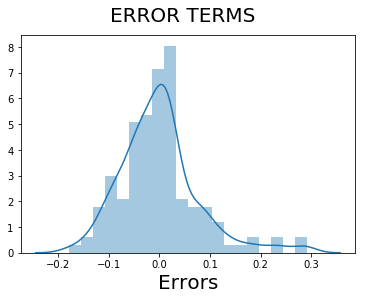

In [132]:
## Plotting the histogram of  error terms
fig=plt.figure()
sns.distplot((Y_train-Y_train_price), bins=20)
fig.suptitle("ERROR TERMS",fontsize=20)
plt.xlabel("Errors",fontsize=20)

In [133]:
num_vars=['horsepower','peakrpm','citympg','highwaympg','price','compressionratio','stroke','boreratio',
             'enginesize','wheelbase', 'carlength','carwidth','carheight','curbweight','symboling']

df_test[num_vars]=scaler.transform(df_test[num_vars])

C:\Users\apurv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\apurv\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [134]:
df_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and Y_test.

In [135]:
Y_test=df_test.pop('price')
X_test=df_test

In [136]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new=X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new=sm.add_constant(X_test_new)

In [137]:
# Making predictions
Y_pred=lm.predict(X_test_new)

## Making Evaluations.

Text(0, 0.5, 'y_pred')

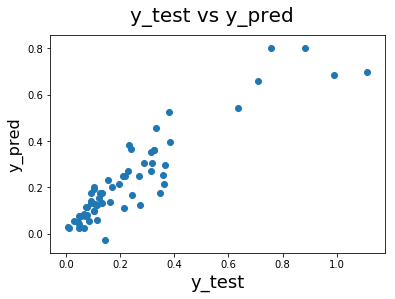

In [138]:
# plotting Y_test and Y_pred to understand the spread.
fig=plt.figure()
plt.scatter(Y_test,Y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [139]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.8306476124590535